### Q.1 KNN Classifier : For classification of images of handwritten digits
 Mount google drive to load the data from

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Import libraries

In [0]:
import numpy as np
import pandas as pd
from numpy import log2 as log
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import operator
import sys
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

> Read train data from the CSV file into a pandas dataframe.

> Slice the label from the dataframe and convert to numpy array.

> Randomly sample 20% of the train data for valiation.

In [0]:
train_df = pd.read_csv("/content/gdrive/My Drive/SMAI/Assignment-1/q1/train.csv", header=None)
validation_df = train_df.sample(frac=0.2)
train_df = train_df.drop(validation_df.index)
train_data = train_df.to_numpy()
validation_data = validation_df.to_numpy()
train_label = train_data[:,0]
train_data = train_data[:,1:]
validation_label = validation_data[:,0]
validation_data = validation_data[:,1:]

> To find the optimal value for k, we should test for sqrt(n) values of k where n = no. of samples. Here we test for 5 values of k.



In [0]:
k = [3,5,7,9,11]
max_k=max(k)
euclid_success=[]
manhatt_success=[]
euclid_dist_mat = []
manhatt_dist_mat=[]



> Apply KNN algorithm. For each validation sample, find euclidean and manhattan distances from all train sample and find the nearest 'k' samples.

In [0]:
def byfirst(elem):
    return elem[0]
    
for q in range(0,len(validation_data)):
    manhatt_dist_vec=[]
    euclid_dist_vec=[]
    for r in range(0,len(train_data)):
        x = validation_data[q] - train_data[r]
        x = np.absolute(x)
        manhatt_dist = np.sum(x)
        manhatt_dist_vec.append((manhatt_dist, train_label[r]))
        manhatt_dist_vec.sort(key=byfirst)
        if (len(manhatt_dist_vec)>max_k):
            manhatt_dist_vec.pop()
        
        x = x*x
        euclid_dist = np.sum(x)
        euclid_dist_vec.append((euclid_dist, train_label[r]))
        euclid_dist_vec.sort(key=byfirst)
        if (len(euclid_dist_vec)>max_k):
            euclid_dist_vec.pop()
    
    manhatt_dist_mat.append(manhatt_dist_vec)
    euclid_dist_mat.append(euclid_dist_vec)



> We perform validation using Scikit-learn's KNN classifier to verify the accuracy and value of k.



> To find the optimum 'k' value, plot the k vs accuracy graph. 

> We observe from graph that the accuracy is highest for k=3.

> We also observe the effect of distance metric. The accuracy is higher for a k when classifying using the Euclidian distance than Manhattan distance.

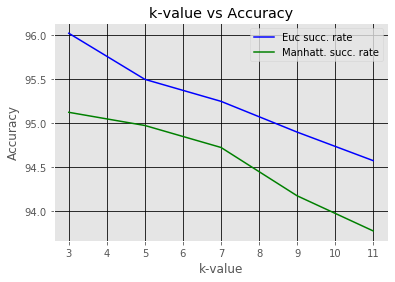

In [0]:
manhatt_predict_label = []
euclid_predict_label = []
for i in k:
    manhatt_succ_count=0
    euclid_succ_count=0
    manhatt_predict_tmp = []
    euclid_predict_tmp = []
    for j in range(0, len(validation_data)):
        man_tmp_dist = manhatt_dist_mat[j][0:i]
        man_max_label=[x[1] for x in man_tmp_dist]
        man_predict_label=max(set(man_max_label), key=man_max_label.count)
        manhatt_predict_tmp.append(man_predict_label)
        if (validation_label[j]==man_predict_label):
            manhatt_succ_count+=1
        
        euc_tmp_dist = euclid_dist_mat[j][0:i]
        euc_max_label=[x[1] for x in euc_tmp_dist]
        euc_predict_label=max(set(euc_max_label), key=euc_max_label.count)
        euclid_predict_tmp.append(euc_predict_label)
        if (validation_label[j]==euc_predict_label):
            euclid_succ_count+=1
    manhatt_predict_label.append(manhatt_predict_tmp)
    euclid_predict_label.append(euclid_predict_tmp)
    manhatt_success.append((manhatt_succ_count/len(validation_data))*100)
    euclid_success.append((euclid_succ_count/len(validation_data))*100)

plt.title("k-value vs Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('k-value')

plt.plot(k,euclid_success,'b', label="Euc succ. rate")
plt.plot(k,manhatt_success,'g', label="Manhatt. succ. rate")
plt.legend()
plt.grid(True, color='k')
plt.show()

In [0]:
data_frame = pd.read_csv('/content/gdrive/My Drive/SMAI/Assignment-1/q1/train.csv',header=None)
train_data = data_frame.iloc[:, 1: 785].values        
test_label = data_frame.iloc[:, 0].values  

X_train, X_test, Y_train, Y_test = train_test_split(train_data, test_label,test_size=0.2)
s1 = pd.Series([X_train])
s2 = pd.Series([Y_train])
df1=pd.concat([s1, s2],axis=1)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
p = neigh.predict(X_test)
print ("Confusion-matrix :")
print(confusion_matrix(Y_test,p))
print("Classification-report")
print (classification_report(Y_test,p))
print ("Accuracy score :", accuracy_score(Y_test,p))

Confusion-matrix :
[[413   0   0   0   0   2   1   0   0   0]
 [  0 435   1   1   1   0   0   2   0   1]
 [  3   7 384   5   0   1   0   6   2   0]
 [  0   2   3 388   0   5   0   1   1   1]
 [  0   2   0   0 371   0   2   0   0  15]
 [  2   3   0   5   2 316   8   0   0   0]
 [  3   2   0   0   0   3 375   0   0   0]
 [  0   4   1   1   0   0   1 432   0  10]
 [  0   3   2   8   5   3   2   1 353   3]
 [  4   0   1   3   5   0   0   9   0 374]]
Classification-report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       416
           1       0.95      0.99      0.97       441
           2       0.98      0.94      0.96       408
           3       0.94      0.97      0.96       401
           4       0.97      0.95      0.96       390
           5       0.96      0.94      0.95       336
           6       0.96      0.98      0.97       383
           7       0.96      0.96      0.96       449
           8       0.99      0.93      0.



> We test the KNN classifier on the test data for k=3 and display the classification report.









In [0]:
k=3
train_df = pd.read_csv("/content/gdrive/My Drive/SMAI/Assignment-1/q1/train.csv", header=None)
train_data = train_df.to_numpy()
train_label = train_data[:,0]
train_data = train_data[:,1:]

test_df = pd.read_csv("/content/gdrive/My Drive/SMAI/Assignment-1/q1/test.csv", header=None)
test_data = test_df.to_numpy()
euclid_success=[]
manhatt_success=[]
euclid_dist_mat = []
manhatt_dist_mat=[]
for q in range(0,len(test_data)):
    manhatt_dist_vec=[]
    euclid_dist_vec=[]
    for r in range(0,len(train_data)):
        x = test_data[q] - train_data[r]
        x = np.absolute(x)
        manhatt_dist = np.sum(x)
        manhatt_dist_vec.append((manhatt_dist, train_label[r]))
        manhatt_dist_vec.sort(key=byfirst)
        if (len(manhatt_dist_vec)>k):
            manhatt_dist_vec.pop()
        
        x = x*x
        euclid_dist = np.sum(x)
        euclid_dist_vec.append((euclid_dist, train_label[r]))
        euclid_dist_vec.sort(key=byfirst)
        if (len(euclid_dist_vec)>k):
            euclid_dist_vec.pop()
        manhatt_dist_mat.append(manhatt_dist_vec)
        euclid_dist_mat.append(euclid_dist_vec)

test_label = list()
with open("/content/gdrive/My Drive/SMAI/Assignment-1/q1/test_labels.csv") as f:
  for line in f:
    test_label.append(line.strip())

manhatt_succ_count=0
euclid_succ_count=0
predict_label = []
for j in range(0, len(test_data)):
    man_tmp_dist = manhatt_dist_mat[j][0:k]
    man_max_label=[x[1] for x in man_tmp_dist]
    man_predict_label=max(set(man_max_label), key=man_max_label.count)
    if (test_label[j]==man_predict_label):
        manhatt_succ_count+=1
    
    euc_tmp_dist = euclid_dist_mat[j][0:k]
    euc_max_label=[x[1] for x in euc_tmp_dist]
    euc_predict_label=max(set(euc_max_label), key=euc_max_label.count)
    predict_label.append(euc_predict_label)
    if (test_label[j]==euc_predict_label):
        euclid_succ_count+=1
    manhatt_success.append(manhatt_succ_count)
    euclid_success.append(euclid_succ_count)
print("Classification report :")    
print(classification_report(test_label, predict_label))